<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.499816,53.791514,33.265112,0.028583,194.585025,194.561949,0.023077
1,0.0,1.0,92.990026,63.795321,46.611888,0.016700,213.413935,213.400526,0.013410
2,0.0,2.0,99.245798,52.347864,29.679482,-0.000477,191.272667,191.279513,-0.006846
3,0.0,3.0,57.940969,35.620557,91.507270,0.009019,195.077814,195.051418,0.026397
4,0.0,4.0,89.963726,31.094703,37.931034,0.065026,169.054488,168.988622,0.065867
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.130517,47.107909,90.358996,-0.038873,222.558550,222.597407,-0.038857
119996,999.0,116.0,23.520487,91.159326,73.499362,-0.013011,198.166164,198.191998,-0.025835
119997,999.0,117.0,42.401747,91.658041,51.371596,-0.006766,195.424618,195.433926,-0.009308
119998,999.0,118.0,87.974136,43.314912,38.383668,-0.068717,179.603999,179.660601,-0.056602


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.499816,53.791514,33.265112,0.028583,194.585025,194.561949,0.023077
1,0.0,1.0,92.990026,63.795321,46.611888,0.016700,213.413935,213.400526,0.013410
2,0.0,2.0,99.245798,52.347864,29.679482,-0.000477,191.272667,191.279513,-0.006846
3,0.0,3.0,57.940969,35.620557,91.507270,0.009019,195.077814,195.051418,0.026397
4,0.0,4.0,89.963726,31.094703,37.931034,0.065026,169.054488,168.988622,0.065867
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.130517,47.107909,90.358996,-0.038873,222.558550,222.597407,-0.038857
119996,999.0,116.0,23.520487,91.159326,73.499362,-0.013011,198.166164,198.191998,-0.025835
119997,999.0,117.0,42.401747,91.658041,51.371596,-0.006766,195.424618,195.433926,-0.009308
119998,999.0,118.0,87.974136,43.314912,38.383668,-0.068717,179.603999,179.660601,-0.056602


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.499816  53.791514  33.265112  ...  194.585025  194.561949  0.023077
      1.0    92.990026  63.795321  46.611888  ...  213.413935  213.400526  0.013410
      2.0    99.245798  52.347864  29.679482  ...  191.272667  191.279513 -0.006846
      3.0    57.940969  35.620557  91.507270  ...  195.077814  195.051418  0.026397
      4.0    89.963726  31.094703  37.931034  ...  169.054488  168.988622  0.065867
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  75.130517  47.107909  90.358996  ...  222.558550  222.597407 -0.038857
      116.0  23.520487  91.159326  73.499362  ...  198.166164  198.191998 -0.025835
      117.0  42.401747  91.658041  51.371596  ...  195.424618  195.433926 -0.009308
      118.0  87.974136  43.314912  38.383668  ...  179.603999  179.660601 -0.056602
      119.0  88.829222  92.681159  64.957821  ...  256.474011  256.455524  0.018487

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.499816  53.791514  33.265112  ...  194.585025  194.561949  0.023077
      1.0    92.990026  63.795321  46.611888  ...  213.413935  213.400526  0.013410
      2.0    99.245798  52.347864  29.679482  ...  191.272667  191.279513 -0.006846
      3.0    57.940969  35.620557  91.507270  ...  195.077814  195.051418  0.026397
      4.0    89.963726  31.094703  37.931034  ...  169.054488  168.988622  0.065867
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  75.130517  47.107909  90.358996  ...  222.558550  222.597407 -0.038857
      116.0  23.520487  91.159326  73.499362  ...  198.166164  198.191998 -0.025835
      117.0  42.401747  91.658041  51.371596  ...  195.424618  195.433926 -0.009308
      118.0  87.974136  43.314912  38.383668  ...  179.603999  179.660601 -0.056602
      119.0  88.829222  92.681159  64.957821  ...  256.474011  256.455524  0.018487

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.499816,53.791514,33.265112,0.028583,194.585025,194.561949,0.023077
1,0.0,1.0,92.990026,63.795321,46.611888,0.016700,213.413935,213.400526,0.013410
2,0.0,2.0,99.245798,52.347864,29.679482,-0.000477,191.272667,191.279513,-0.006846
3,0.0,3.0,57.940969,35.620557,91.507270,0.009019,195.077814,195.051418,0.026397
4,0.0,4.0,89.963726,31.094703,37.931034,0.065026,169.054488,168.988622,0.065867
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.130517,47.107909,90.358996,-0.038873,222.558550,222.597407,-0.038857
119996,999.0,116.0,23.520487,91.159326,73.499362,-0.013011,198.166164,198.191998,-0.025835
119997,999.0,117.0,42.401747,91.658041,51.371596,-0.006766,195.424618,195.433926,-0.009308
119998,999.0,118.0,87.974136,43.314912,38.383668,-0.068717,179.603999,179.660601,-0.056602


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    97.499816  53.791514  33.265112  ...  194.585025  194.561949  0.023077
      1.0    92.990026  63.795321  46.611888  ...  213.413935  213.400526  0.013410
      2.0    99.245798  52.347864  29.679482  ...  191.272667  191.279513 -0.006846
      3.0    57.940969  35.620557  91.507270  ...  195.077814  195.051418  0.026397
      4.0    89.963726  31.094703  37.931034  ...  169.054488  168.988622  0.065867
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  75.130517  47.107909  90.358996  ...  222.558550  222.597407 -0.038857
      116.0  23.520487  91.159326  73.499362  ...  198.166164  198.191998 -0.025835
      117.0  42.401747  91.658041  51.371596  ...  195.424618  195.433926 -0.009308
      118.0  87.974136  43.314912  38.383668  ...  179.603999  179.660601 -0.056602
      119.0  88.829222  92.681159  64.957821  ...  256.474011  256.455524  0.018487

[120000 rows x 7 columns]

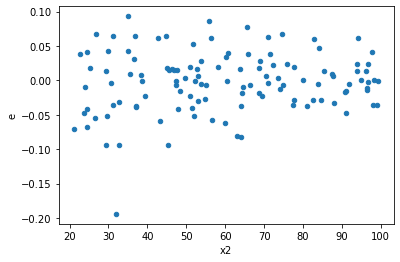

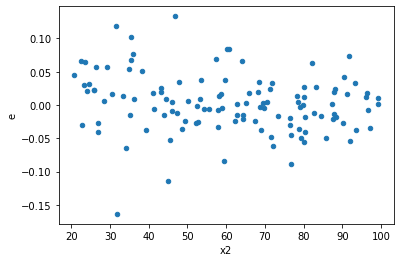

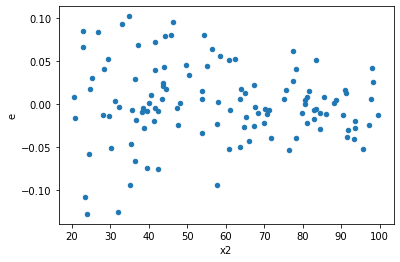

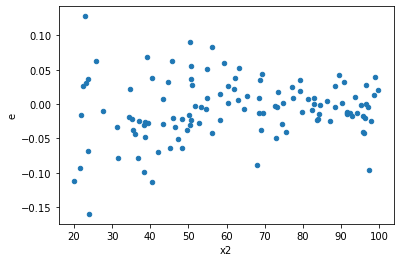

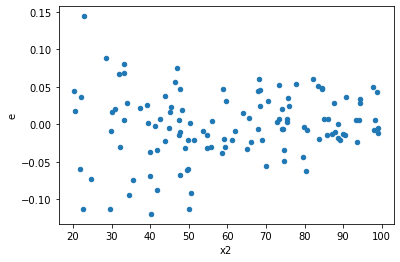

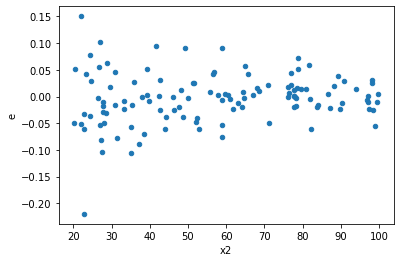

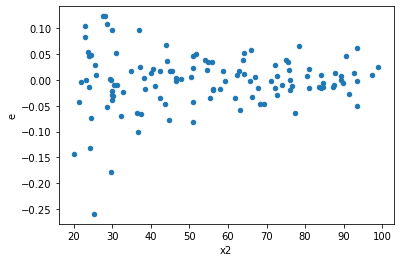

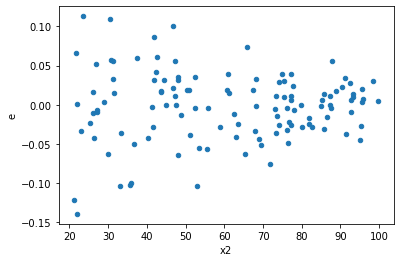

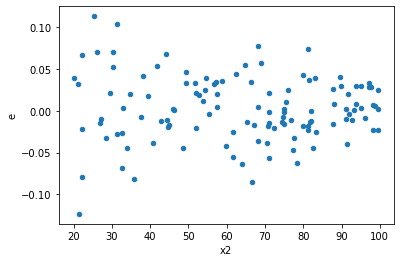

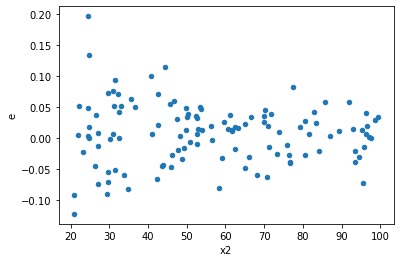

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.12319765780571212,0.03685363275939492,0.002737725729015825,0.0008189696168754427,0.29914231663003404,9.115191351033318e-05,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,0.12536898486342296,0.03997116776627363,0.0027859774414093993,0.0008882481725838585,0.3188281998918492,0.0002019300492171404,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,0.1403137613542088,0.03007061311771321,0.0031180835856490846,0.0006682358470602935,0.21430979276368192,8.911177095848315e-07,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,0.14532191048144488,0.028900548474740557,0.0032293757884765528,0.0006422344105497901,0.19887261582919158,2.862097879557868e-07,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,0.1525188403202548,0.040796943159264354,0.003389307562672329,0.0009065987368725412,0.2674878924702028,2.100974460235734e-05,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,0.1628351717779714,0.033136379890655786,0.003618559372843809,0.0007363639975701286,0.20349645306259642,4.072612310076727e-07,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,0.26859714122904044,0.04063834732466679,0.005968825360645343,0.0009030743849925953,0.1512985102474092,3.4440430195725232e-09,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,0.14881822949703788,0.023730538584964503,0.003307071766600842,0.0005273453018881,0.15945989053334922,8.300947701388103e-09,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,0.09515451487842588,0.032095907206621754,0.0021145447750761308,0.0007132423823693723,0.3373030407188673,0.0003975428260491413,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    980
Reject001=1 : Homoscedasticity       20
Name: Result_test, dtype: int64